### The Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal 

Create a  model for price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing pandas, numpy and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
%matplotlib inline

### Reading & Understanding the Data


In [18]:
#Read the data
df=pd.read_csv("train.csv")
df.shape


(1460, 81)

In [20]:
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [21]:
df.info() # there are missing values for some vars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [23]:
print(round(100*df.isna().mean()))

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      18.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64


 Variable creation and missing value imputation 

In [24]:
# Age of the house 
df['AgeHouse'] = df['YrSold'] - df['YearBuilt']
# YearRemodAdd, GarageYrBlt and MoSold columns are redundant-- removing them
df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace=True)
df.shape

(1460, 77)

In [25]:
# data type conversion for vars OverallQual, OverallCond and MSSubClass they hold categorical data 


df['OverallCond'] = df['OverallCond'].astype('object')
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-null float64
ExterQual        146

In [26]:
#Summary of Numric columns
df.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   
AgeHouse       1460.0      36.547945     30.250152      0.0       8.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageCars          2.0       2.00       4.0  
GarageArea        480.0     576.00    1418.0  
WoodDeckSF          0.0     168.00     857.0  
OpenPorchSF        25.0      68.00     547.0  
EnclosedPorch       0.0       0.00     552.0  
3SsnPorch           0.0       0.00     508.0  
ScreenPorch         0.0       0.00     480.0  
PoolArea            0.0       0.00     738.0  
MiscVal             0.0       0.00   15500.0  
SalePrice      163000.0  214000.00  755000.0  
AgeHouse           35.0      54.00     136.0

Handling missing values having NA

In [27]:

df['PoolQC'] = df['PoolQC'].replace(np.nan, 'No Pool')
df['Fence'] = df['Fence'].replace(np.nan, 'No Fence')
df['MiscFeature'] = df['MiscFeature'].replace(np.nan, 'No MiscFeature')
df['Alley'] = df['Alley'].replace(np.nan, 'No Alley')
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'No Basement')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'No Basement')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'No Basement')
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan, 'No Fireplace')
df['GarageType'] = df['GarageType'].replace(np.nan, 'No Garage')
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'No Garage')
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'No Garage')
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'No Garage')


In [28]:
# Checking percentage of missing values in columns
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('Missing').sort_values(by='Missing' , ascending=False)

Missing
LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
KitchenAbvGr     0.00
...               ...
Foundation       0.00
ExterCond        0.00
ExterQual        0.00
Exterior2nd      0.00
AgeHouse         0.00

[77 rows x 1 columns]

In [31]:
#Variable having max missing values
df['LotFrontage'].describe()


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [33]:
#though mean and median are alsmost same, but we would prefer median to impute the missing var to avoid any outlier

df.loc[np.isnan(df['LotFrontage']), 'LotFrontage'] = df['LotFrontage'].median()

df['LotFrontage'].describe()


count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [35]:
#mising val imputation
df['MasVnrArea'].fillna(0.0, inplace=True)
df['MasVnrType'].fillna('None', inplace=True)

In [36]:
#Electrical  - Missing
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [37]:
# Imputing Electrical column missing values with  mode:  SBrkr
df.loc[pd.isnull(df['Electrical']), ['Electrical']] = 'SBrkr'


In [38]:
# Checking percentage of missing values in columns
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('Missing').sort_values(by='Missing' , ascending=False)

Missing
Id                0.0
BedroomAbvGr      0.0
GarageType        0.0
FireplaceQu       0.0
Fireplaces        0.0
...               ...
ExterQual         0.0
MasVnrArea        0.0
MasVnrType        0.0
Exterior2nd       0.0
AgeHouse          0.0

[77 rows x 1 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       146

There are no missing value now

### Numrical Variable descriptive Stats Analysis : Outlier Treatment

In [41]:
# Numeric vars
numeric_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)

numeric_cols.remove('Id')
print(numeric_cols)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeHouse']


In [42]:
# Plotting  the numeric columns
plt.figure(figsize=(30,40))
for i in enumerate(numeric_cols):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(x=i[1], data=df)

Outliers are present for all the numeric vars except full bath & half bath as bathrooms are not varies so much

### Categorical Data analysis

In [43]:
# List of categorical columns
category_cols = df.select_dtypes(include='object').columns
category_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [44]:
## Values for each categorical value to know the segment and if required do fine corarsing
for col in list(category_cols):
    print(df[col].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor    

In [45]:
### Dropping categorical variable based on low variance  -- here there is very low mean considering the categories hence dropping

df.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition2','BldgType','RoofMatl','BsmtCond','Heating',
         'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType','ExterCond','BsmtFinType2'],
       axis=1, inplace=True)


In [46]:
df.shape

(1460, 56)

#Combining the lower number of value counts into a new value called "Other".
#Creating the dummy variables for the categorical variables with multiple levels.
#Dropping the dummy column, which has very low number of values (E.g.:-Other

In [47]:
#MSZoning
df = df.replace({'MSZoning': {'C (all)':'Other', 'RH':'Other', 'FV':'Other'}})
df['MSZoning'].value_counts()

RL       1151
RM        218
Other      91
Name: MSZoning, dtype: int64

In [48]:
# Creating dummy variable
mz = pd.get_dummies(df['MSZoning'], prefix = 'MSZoning')
# Dropping MSZoning_Other column
mz = mz.drop('MSZoning_Other', axis=1)
# Adding result to master df
df = pd.concat([df, mz], axis=1)
# Dropping original variable
df = df.drop('MSZoning', axis=1)


In [49]:
#LotShape
df = df.replace({'LotShape': {'IR2':'Other', 'IR3':'Other'}})
df['LotShape'].value_counts()

Reg      925
IR1      484
Other     51
Name: LotShape, dtype: int64

In [50]:
# Creating dummy variable
ls = pd.get_dummies(df['LotShape'], prefix = 'LotShape')
# Dropping Other column
ls = ls.drop('LotShape_Other', axis=1)
# Adding result to master df
df = pd.concat([df, ls], axis=1)
# Dropping original variable
df = df.drop('LotShape', axis=1)

In [51]:
#LotConfig
df = df.replace({'LotConfig': {'CulDSac':'Other', 'FR2':'Other', 'FR3':'Other'}})

df['LotConfig'].value_counts()


Inside    1052
Corner     263
Other      145
Name: LotConfig, dtype: int64

In [52]:
# Creating dummy variable
lc = pd.get_dummies(df['LotConfig'], prefix = 'LotConfig')
# Dropping Other column
lc = lc.drop('LotConfig_Other', axis=1)
# Adding result to master df
df = pd.concat([df, lc], axis=1)
# Dropping original variable
df = df.drop('LotConfig', axis=1)

In [53]:
#neighborhood
df = df.replace({'Neighborhood': {'Blueste':'Other', 'NPkVill':'Other', 'Veenker':'Other', 'BrDale':'Other', 'Blmngtn':'Other',
                                 'MeadowV':'Other', 'SWISU':'Other', 'StoneBr':'Other', 'ClearCr':'Other',
                                 'IDOTRR':'Other', 'Timber':'Other', 'NoRidge':'Other', 'Mitchel':'Other'}})
df['Neighborhood'].value_counts()

Other      315
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Name: Neighborhood, dtype: int64

In [54]:
# Creating dummy variable
nh = pd.get_dummies(df['Neighborhood'], prefix = 'Neighborhood')
# Dropping Other column
nh = nh.drop('Neighborhood_Other', axis=1)
# Adding result to master df
df = pd.concat([df, nh], axis=1)
# Dropping original variable
df = df.drop('Neighborhood', axis=1)

In [55]:
#Condition1
df = df.replace({'Condition1': {'RRNe':'Other', 'RRNn':'Other', 'PosA':'Other', 'RRAe':'Other', 'PosN':'Other',
                               'RRAn':'Other', 'Artery':'Other'}})
df['Condition1'].value_counts()

Norm     1260
Other     119
Feedr      81
Name: Condition1, dtype: int64

In [56]:
# Creating dummy variable
co = pd.get_dummies(df['Condition1'], prefix = 'Condition1')
# Dropping Other column
co = co.drop('Condition1_Other', axis=1)
# Adding result to master df
df = pd.concat([df, co], axis=1)
# Dropping original variable
df = df.drop('Condition1', axis=1)

In [57]:
#HouseStyle
df = df.replace({'HouseStyle': {'2.5Fin':'Other', '2.5Unf':'Other', '1.5Unf':'Other', 'SFoyer':'Other', 'SLvl':'Other'}})    
df['HouseStyle'].value_counts()


1Story    726
2Story    445
1.5Fin    154
Other     135
Name: HouseStyle, dtype: int64

In [58]:
# Creating dummy variable
hs = pd.get_dummies(df['HouseStyle'], prefix = 'HouseStyle')
# Dropping Other column
hs = hs.drop('HouseStyle_Other', axis=1)
# Adding result to master df
df = pd.concat([df, hs], axis=1)
# Dropping original variable
df = df.drop('HouseStyle', axis=1)

In [59]:
df = df.replace({'OverallQual': {1:'Other', 2:'Other', 10:'Other', 3:'Other', 9:'Other'}}) 
# Creating dummy variable
oq = pd.get_dummies(df['OverallQual'], prefix = 'OverallQual')
# Dropping Other column
oq = oq.drop('OverallQual_Other', axis=1)
# Adding result to master df
df = pd.concat([df, oq], axis=1)
# Dropping original variable
df = df.drop('OverallQual', axis=1)

In [60]:
#overall condition
df = df.replace({'OverallCond': {1:'Other', 2:'Other', 9:'Other', 3:'Other', 4:'Other'}})
# Creating dummy variable
oc = pd.get_dummies(df['OverallCond'], prefix = 'OverallCond')
# Dropping Other column
oc = oc.drop('OverallCond_Other', axis=1)
# Adding result to master df
df = pd.concat([df, oc], axis=1)
# Dropping original variable
df = df.drop('OverallCond', axis=1)


In [61]:
#RoofStyle
df = df.replace({'RoofStyle': {'Shed':'Other', 'Mansard':'Other', 'Gambrel':'Other', 'Flat':'Other'}})

In [62]:
# Creating dummy variable
rs = pd.get_dummies(df['RoofStyle'], prefix = 'RoofStyle')
# Dropping Other column
rs = rs.drop('RoofStyle_Other', axis=1)
# Adding result to master df
df = pd.concat([df, rs], axis=1)
# Dropping original variable
df = df.drop('RoofStyle', axis=1)

In [63]:
#Exterior1st
df = df.replace({'Exterior1st': {'ImStucc':'Other', 'AsphShn':'Other', 'CBlock':'Other', 'BrkComm':'Other','Stone':'Other',
                              'AsbShng':'Other','Stucco':'Other','WdShing':'Other','BrkFace':'Other','CemntBd':'Other'}})


# Creating dummy variable
ex = pd.get_dummies(df['Exterior1st'], prefix = 'Exterior1st')
# Dropping Other column
ex = ex.drop('Exterior1st_Other', axis=1)
# Adding result to master df
df = pd.concat([df, ex], axis=1)
# Dropping original variable
df = df.drop('Exterior1st', axis=1)



In [64]:
#Exterior2nd
df = df.replace({'Exterior2nd': {'CBlock':'Other', 'AsphShn':'Other', 'Stone':'Other', 'Brk Cmn':'Other','ImStucc':'Other',
                              'AsbShng':'Other','BrkFace':'Other','Stucco':'Other','Wd Shng':'Other','CmentBd':'Other'}})
# Creating dummy variable
ex2 = pd.get_dummies(df['Exterior2nd'], prefix = 'Exterior2nd')
# Dropping Other column
ex2 = ex2.drop('Exterior2nd_Other', axis=1)
# Adding result to master df
df = pd.concat([df, ex2], axis=1)
# Dropping original variable
df = df.drop('Exterior2nd', axis=1)

In [65]:
#MasVnrType

# Creating dummy variable
mv = pd.get_dummies(df['MasVnrType'], prefix = 'MasVnrType')
# Dropping Other column
mv = mv.drop('MasVnrType_BrkCmn', axis=1)
# Adding result to master df
df = pd.concat([df, mv], axis=1)
# Dropping original variable
df = df.drop('MasVnrType', axis=1)


In [66]:
#ExterQual

df = df.replace({'ExterQual': {'Fa':'Other', 'Ex':'Other'}})
# Creating dummy variable
exq = pd.get_dummies(df['ExterQual'], prefix = 'ExterQual')
# Dropping Other column
exq = exq.drop('ExterQual_Other', axis=1)
# Adding result to master df
df = pd.concat([df, exq], axis=1)
# Dropping original variable
df = df.drop('ExterQual', axis=1)

In [67]:
#Foundation
df = df.replace({'Foundation': {'Wood':'Other', 'Stone':'Other','Slab':'Other'}})
# Creating dummy variable
fo = pd.get_dummies(df['Foundation'], prefix = 'Foundation')
# Dropping Other column
fo = fo.drop('Foundation_Other', axis=1)
# Adding result to master df
df = pd.concat([df, fo], axis=1)
# Dropping original variable
df = df.drop('Foundation', axis=1)

In [68]:
#BsmtQual
df = df.replace({'BsmtQual': {'Fa':'Other', 'No Basement':'Other'}})
# Creating dummy variable
bq = pd.get_dummies(df['BsmtQual'], prefix = 'BsmtQual')
# Dropping Other column
bq = bq.drop('BsmtQual_Other', axis=1)
# Adding result to master df
df = pd.concat([df, bq], axis=1)
# Dropping original variable
df = df.drop('BsmtQual', axis=1)

In [69]:
# Creating dummy variable
be = pd.get_dummies(df['BsmtExposure'], prefix = 'BsmtExposure')
# Dropping Other column
be = be.drop('BsmtExposure_No Basement', axis=1)
# Adding result to master df
df = pd.concat([df, be], axis=1)
# Dropping original variable
df = df.drop('BsmtExposure', axis=1)

In [70]:
#BsmtFinType1

# Creating dummy variable
bf = pd.get_dummies(df['BsmtFinType1'], prefix = 'BsmtFinType1')
# Dropping Other column
bf = bf.drop('BsmtFinType1_No Basement', axis=1)
# Adding result to master df
df = pd.concat([df, bf], axis=1)
# Dropping original variable
df = df.drop('BsmtFinType1', axis=1)


In [71]:
#HeatingQC
df = df.replace({'HeatingQC': {'Fa':'Other', 'Po':'Other'}})
# Creating dummy variable
hc = pd.get_dummies(df['HeatingQC'], prefix = 'HeatingQC')
# Dropping Other column
hc = hc.drop('HeatingQC_Other', axis=1)
# Adding result to master df
df = pd.concat([df, hc], axis=1)
# Dropping original variable
df = df.drop('HeatingQC', axis=1)

In [72]:
#KitchenQual

df = df.replace({'KitchenQual': {'Fa':'Other', 'Ex':'Other'}})

# Creating dummy variable
kq = pd.get_dummies(df['KitchenQual'], prefix = 'KitchenQual')
# Dropping Other column
kq = kq.drop('KitchenQual_Other', axis=1)
# Adding result to master df
df = pd.concat([df, kq], axis=1)
# Dropping original variable
df = df.drop('KitchenQual', axis=1)

In [73]:
#FireplaceQu
df = df.replace({'FireplaceQu': {'Fa':'Other', 'Ex':'Other','Po':'Other'}})
# Creating dummy variable
fq = pd.get_dummies(df['FireplaceQu'], prefix = 'FireplaceQu')
# Dropping Other column
fq = fq.drop('FireplaceQu_Other', axis=1)
# Adding result to master df
df = pd.concat([df, fq], axis=1)
# Dropping original variable
df = df.drop('FireplaceQu', axis=1)

In [74]:
#GarageType
df = df.replace({'GarageType': {'2Types':'Other', 'CarPort':'Other','Basment':'Other'}})

In [75]:
# Creating dummy variable
gt = pd.get_dummies(df['GarageType'], prefix = 'GarageType')
# Dropping Other column
gt = gt.drop('GarageType_Other', axis=1)
# Adding result to master df
df = pd.concat([df, gt], axis=1)
# Dropping original variable
df = df.drop('GarageType', axis=1)

In [76]:
#GarageFinish
# Creating dummy variable
gf = pd.get_dummies(df['GarageFinish'], prefix = 'GarageFinish')
# Dropping Other column
gf = gf.drop('GarageFinish_No Garage', axis=1)
# Adding result to master df
df = pd.concat([df, gf], axis=1)
# Dropping original variable
df = df.drop('GarageFinish', axis=1)

In [77]:
#Fence

df = df.replace({'Fence': {'MnWw':'Other', 'GdWo':'Other','GdPrv':'Other'}})

# Creating dummy variable
fe = pd.get_dummies(df['Fence'], prefix = 'Fence')
# Dropping Other column
fe = fe.drop('Fence_Other', axis=1)
# Adding result to master df
df = pd.concat([df, fe], axis=1)
# Dropping original variable
df = df.drop('Fence', axis=1)

In [78]:
#SaleCondition
df = df.replace({'SaleCondition': {'AdjLand':'Other', 'Alloca':'Other','Family':'Other'}})
# Creating dummy variable
se = pd.get_dummies(df['SaleCondition'], prefix = 'SaleCondition')
# Dropping Other column
se = se.drop('SaleCondition_Other', axis=1)
# Adding result to master df
df = pd.concat([df, se], axis=1)
# Dropping original variable
df = df.drop('SaleCondition', axis=1)


In [79]:
#MSSubClass
df = df.replace({'MSSubClass': {40:'Other', 180:'Other',45:'Other', 75:'Other',85:'Other',190:'Other',90:'Other',
                               80:'Other',70:'Other',160:'Other',30:'Other'}})


In [80]:
# Creating dummy variable
ms = pd.get_dummies(df['MSSubClass'], prefix = 'MSSubClass')
# Dropping Other column
ms = ms.drop('MSSubClass_Other', axis=1)
# Adding result to master df
df = pd.concat([df, ms], axis=1)
# Dropping original variable
df = df.drop('MSSubClass', axis=1)



In [81]:
df.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   1         65.0     8450       196.0         706           0        150   
1   2         80.0     9600         0.0         978           0        284   
2   3         68.0    11250       162.0         486           0        434   
3   4         60.0     9550         0.0         216           0        540   
4   5         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0           2         548           0           61              0   
1           1           2         460         298            0              0   
2           1           2         608           0           42              0   
3           1           3         642           0           35            272   
4           1           3         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  AgeHouse  \
0          0            0         0        0     208500         5   
1          0            0         0        0     181500        31   
2          0            0         0        0     223500         7   
3          0            0         0        0     140000        91   
4          0            0         0        0     250000         8   

   MSZoning_RL  MSZoning_RM  LotShape_IR1  LotShape_Reg  LotConfig_Corner  \
0            1            0             0             1                 0   
1            1            0             0             1                 0   
2            1            0             1             0                 0   
3            1            0             1             0                 1   
4            1            0             1             0                 0   

   LotConfig_Inside  Neighborhood_BrkSide  Neighborhood_CollgCr  \
0                 1                     0                     1   
1                 0                     0                     0   
2                 1                     0                     1   
3                 0                     0                     0   
4                 0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NridgHt  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0       

#Target variable SalePrice

AttributeError: 'Rectangle' object has no property 'normed'

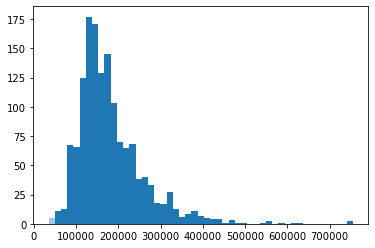

In [86]:
sns.distplot(df['SalePrice'])
plt.show()

In [87]:
# Skewness
df['SalePrice'].skew()

1.8828757597682129

## Data Preparation for Moeling

In [88]:
# Import library
from sklearn.model_selection import train_test_split

In [89]:
# Dropping the Id column
df = df.drop('Id', axis=1)

In [90]:
# Splitting data into train and test set with 80 :20 ratio
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)

print(df_train.shape)
print(df_test.shape)


(1168, 119)
(292, 119)


# Feature Scaling

In [91]:
# Normalization Method
from sklearn.preprocessing import MinMaxScaler

In [92]:

# Instantiate the scaler
scaler = MinMaxScaler()

In [93]:
# Sclaing only the numeric variables. We don't need to scale the binary variables as they are already scaled into 0 and 1
# Numeric columns list
numeric_cols = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
# Fit the data into scaler and transform
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
133      0.164384  0.025955     0.08500    0.178065    0.000000   0.112158   
290      0.339041  0.066891     0.00000    0.000000    0.000000   0.461901   
24       0.164384  0.032466     0.00000    0.033310    0.453189   0.087329   
1093     0.171233  0.037066     0.10375    0.117116    0.000000   0.086901   
1288     0.065068  0.020398     0.00000    0.205174    0.000000   0.146832   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
133      0.207365  0.213889   0.00000           0.0   0.164873      0.333333   
290      0.176596  0.163657   0.40678           0.0   0.284589      0.000000   
24       0.173486  0.159259   0.00000           0.0   0.119523      0.333333   
1093     0.141408  0.191667   0.00000           0.0   0.146426      0.333333   
1288     0.245663  0.297917   0.00000           0.0   0.234627      0.333333   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
133            0.0  0.666667       0.0         0.250           0.0   
290            0.0  0.666667       0.5         0.375           0.0   
24             0.0  0.333333       0.0         0.375           0.0   
1093           0.0  0.333333       0.5         0.125           0.0   
1288           0.0  0.666667       0.0         0.250           0.0   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
133       0.272727    0.000000        0.50    0.332158    0.224037   
290       0.454545    0.333333        0.50    0.483075    0.000000   
24        0.272727    0.333333        0.25    0.190409    0.473746   
1093      0.272727    0.000000        0.50    0.623413    0.000000   
1288      0.181818    0.333333        0.50    0.351904    0.247375   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
133      0.047801            0.0        0.0          0.0       0.0      0.0   
290      0.097514            0.0        0.0          0.0       0.0      0.0   
24       0.172084            0.0        0.0          0.0       0.0      0.0   
1093     0.122371            0.0        0.0          0.0       0.0      0.0   
1288     0.112811            0.0        0.0          0.0       0.0      0.0   

      SalePrice  AgeHouse  MSZoning_RL  MSZoning_RM  LotShape_IR1  \
133    0.257048  0.058824            1            0             1   
290    0.275420  0.000000            1            0             0   
24     0.165394  0.308824            1            0             1   
1093   0.154284  0.301471            1            0             0   
1288   0.337592  0.066176            1            0             1   

      LotShape_Reg  LotConfig_Corner  LotConfig_Inside  Neighborhood_BrkSide  \
133              0                 0                 1                     0   
290              1                 0                 1                     0   
24               0                 0                 1                     0   
1093             1                 1                 0                     0   
1288             0                 0                 1                     0   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
133                      0                     0                     0   
290                      1                     0                     0   
24                       0                     0                     0   
1093                     0                     0                     0   
1288                     0                     0                     0   

      Neighborhood_Gilbert  Neighborhood_NAmes  Neighborhood_NWAmes  \
133                      0                   0                    0   
290                      0                   0                    0   
24                       0                   0                    0   
1093                     0                   1                    0   
1288                     0                 

In [94]:
df_train.describe()

LotFrontage      LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.167002     0.042887     0.064654     0.079963     0.032908   
std       0.074365     0.045996     0.114770     0.082155     0.113389   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.133562     0.028979     0.000000     0.000000     0.000000   
50%       0.164384     0.038538     0.000000     0.069454     0.000000   
75%       0.198630     0.048087     0.100000     0.127746     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      0.240786     0.173861     0.184435     0.167664      0.011697   
std       0.190992     0.073869     0.091376     0.211468      0.093282   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.092466     0.130115     0.118519     0.000000      0.000000   
50%       0.196918     0.162848     0.165162     0.000000      0.000000   
75%       0.345890     0.213421     0.239236     0.352542      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean      0.208111      0.145833      0.028682     0.521975     0.187928   
std       0.100935      0.173849      0.118145     0.182789     0.249249   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%       0.133887      0.000000      0.000000     0.333333     0.000000   
50%       0.198405      0.000000      0.000000     0.666667     0.000000   
75%       0.257254      0.333333      0.000000     0.666667     0.500000   
max       1.000000      1.000000      1.000000     1.000000     1.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean       0.358412      0.025685      0.320828     0.202340     0.443707   
std        0.101564      0.114237      0.144710     0.213025     0.186547   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.250000      0.000000      0.181818     0.000000     0.250000   
50%        0.375000      0.000000      0.272727     0.333333     0.500000   
75%        0.375000      0.000000      0.363636     0.333333     0.500000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean      0.334484     0.110482     0.088372       0.043579     0.007023   
std       0.151085     0.147128     0.123962       0.115607     0.060108   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       0.235896     0.000000     0.000000       0.000000     0.000000   
50%       0.338505     0.000000     0.045889       0.000000     0.000000   
75%       0.406206     0.196033     0.130497       0.000000     0.000000   
max       1.000000     1.000000     1.000000       1.000000     1.000000   

       ScreenPorch     PoolArea      MiscVal    SalePrice     AgeHouse  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.035011     0.002900     0.002913     0.202364     0.271964   
std       0.132352     0.049822     0.035025     0.110059     0.225087   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.131197     0.058824   
50%       0.000000     0.000000     0.000000     0.175462     0.257353   
75%       0.000000     0.000000     0.000000     0.250104     0.406250   
max     

In [97]:
# Variables more than 0.70 correlations 
c = df_train.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
df_corr = pd.DataFrame(so)
#df_corr.columns = ['correlations']
print(df_corr[(df_corr[0] < 1) & (df_corr[0] > 0.7)])

                                                          0
Exterior1st_MetalSd      Exterior2nd_MetalSd       0.978075
Exterior2nd_MetalSd      Exterior1st_MetalSd       0.978075
Exterior1st_VinylSd      Exterior2nd_VinylSd       0.977136
Exterior2nd_VinylSd      Exterior1st_VinylSd       0.977136
RoofStyle_Gable          RoofStyle_Hip             0.950398
RoofStyle_Hip            RoofStyle_Gable           0.950398
HouseStyle_1.5Fin        MSSubClass_50             0.928276
MSSubClass_50            HouseStyle_1.5Fin         0.928276
LotShape_Reg             LotShape_IR1              0.923644
LotShape_IR1             LotShape_Reg              0.923644
ExterQual_TA             ExterQual_Gd              0.908961
ExterQual_Gd             ExterQual_TA              0.908961
FireplaceQu_No Fireplace Fireplaces                0.901078
Fireplaces               FireplaceQu_No Fireplace  0.901078
GarageArea               GarageCars                0.887071
GarageCars               GarageArea     

In [98]:
df_train = df_train.drop(['Exterior2nd_VinylSd','Exterior2nd_MetalSd','HouseStyle_1.5Fin','RoofStyle_Hip','LotShape_IR1',
                         'ExterQual_Gd','Fireplaces','GarageCars','Exterior2nd_HdBoard','Exterior2nd_Wd Sdng',
                         'KitchenQual_Gd','TotRmsAbvGrd','HouseStyle_2Story','MSZoning_RM','MasVnrType_BrkFace',
                         'TotalBsmtSF','Foundation_CBlock','HouseStyle_1Story','BsmtQual_Gd','LotConfig_Corner',
                         'Exterior2nd_Plywood','Fence_MnPrv','GarageType_Detchd'], axis=1)

In [99]:
df_train.shape

(1168, 96)

In [100]:
# Popping out the SalePrice column for y_train
y_train = df_train.pop('SalePrice')
# Creating X_train
X_train = df_train

In [101]:
y_train.head()

133     0.257048
290     0.275420
24      0.165394
1093    0.154284
1288    0.337592
Name: SalePrice, dtype: float64

In [102]:
X_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
133      0.164384  0.025955     0.08500    0.178065    0.000000   0.112158   
290      0.339041  0.066891     0.00000    0.000000    0.000000   0.461901   
24       0.164384  0.032466     0.00000    0.033310    0.453189   0.087329   
1093     0.171233  0.037066     0.10375    0.117116    0.000000   0.086901   
1288     0.065068  0.020398     0.00000    0.205174    0.000000   0.146832   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
133   0.213889   0.00000           0.0   0.164873      0.333333           0.0   
290   0.163657   0.40678           0.0   0.284589      0.000000           0.0   
24    0.159259   0.00000           0.0   0.119523      0.333333           0.0   
1093  0.191667   0.00000           0.0   0.146426      0.333333           0.0   
1288  0.297917   0.00000           0.0   0.234627      0.333333           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  GarageArea  WoodDeckSF  \
133   0.666667       0.0         0.250           0.0    0.332158    0.224037   
290   0.666667       0.5         0.375           0.0    0.483075    0.000000   
24    0.333333       0.0         0.375           0.0    0.190409    0.473746   
1093  0.333333       0.5         0.125           0.0    0.623413    0.000000   
1288  0.666667       0.0         0.250           0.0    0.351904    0.247375   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
133      0.047801            0.0        0.0          0.0       0.0      0.0   
290      0.097514            0.0        0.0          0.0       0.0      0.0   
24       0.172084            0.0        0.0          0.0       0.0      0.0   
1093     0.122371            0.0        0.0          0.0       0.0      0.0   
1288     0.112811            0.0        0.0          0.0       0.0      0.0   

      AgeHouse  MSZoning_RL  LotShape_Reg  LotConfig_Inside  \
133   0.058824            1             0                 1   
290   0.000000            1             1                 1   
24    0.308824            1             0                 1   
1093  0.301471            1             1                 0   
1288  0.066176            1             0                 1   

      Neighborhood_BrkSide  Neighborhood_CollgCr  Neighborhood_Crawfor  \
133                      0                     0                     0   
290                      0                     1                     0   
24                       0                     0                     0   
1093                     0                     0                     0   
1288                     0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_NAmes  \
133                      0                     0                   0   
290                      0                     0                   0   
24                       0                     0                   0   
1093                     0                     0                   1   
1288                     0                     0                   0   

      Neighborhood_NWAmes  Neighborhood_NridgHt  Neighborhood_OldTown  \
133                     0                     0                     0   
290                     0                     0                     0   
24                      0                     0                     0   
1093                    0                     0                     0   
1288                    0                     0                     0   

      Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
133                     0                     0                     0   
290                     0                     0                     0   
24                      1                     0                     0   
1093                    0                     0                     0   
1288                    0        

In [103]:

# Scale the test set variables with min-max scaler
# We don't fit scaler on the test set. We only transform the test set.
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols]) 
df_test.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1436     0.133562  0.035991     0.00000    0.109142         0.0   0.106164   
57       0.232877  0.048354     0.00000    0.000000         0.0   0.368151   
780      0.143836  0.030732     0.02375    0.000000         0.0   0.529538   
382      0.198630  0.037136     0.00000    0.000000         0.0   0.401969   
1170     0.188356  0.040104     0.00000    0.092488         0.0   0.245719   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1436     0.141408  0.113889  0.000000           0.0   0.081860      0.000000   
57       0.140753  0.112963  0.416465           0.0   0.246349      0.000000   
780      0.202455  0.203935  0.000000           0.0   0.156610      0.000000   
382      0.153682  0.131250  0.415496           0.0   0.261145      0.000000   
1170     0.179378  0.172685  0.000000           0.0   0.130669      0.333333   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1436           0.0  0.333333       0.0         0.375           0.0   
57             0.0  0.666667       0.5         0.375           0.0   
780            0.0  0.666667       0.0         0.375           0.0   
382            0.0  0.666667       0.5         0.375           0.0   
1170           0.0  0.333333       0.0         0.375           0.0   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
1436      0.181818    0.000000        0.50    0.372355    0.000000   
57        0.363636    0.000000        0.50    0.398449    0.000000   
780       0.272727    0.333333        0.50    0.283498    0.256709   
382       0.454545    0.000000        0.50    0.450635    0.168028   
1170      0.272727    0.333333        0.25    0.252468    0.236873   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1436     0.000000            0.0        0.0          0.0  0.000000      0.0   
57       0.133843            0.0        0.0          0.0  0.000000      0.0   
780      0.040153            0.0        0.0          0.0  0.000000      0.0   
382      0.101338            0.0        0.0          0.0  0.000000      0.0   
1170     0.000000            0.0        0.0          0.0  0.888889      0.0   

      SalePrice  AgeHouse  MSZoning_RL  MSZoning_RM  LotShape_IR1  \
1436   0.118872  0.264706            1            0             0   
57     0.224413  0.014706            1            0             1   
780    0.195945  0.088235            1            0             0   
382    0.248021  0.007353            1            0             1   
1170   0.189002  0.227941            1            0             0   

      LotShape_Reg  LotConfig_Corner  LotConfig_Inside  Neighborhood_BrkSide  \
1436             1                 0                 0                     0   
57               0                 1                 0                     0   
780              1                 0                 1                     0   
382              0                 0                 1                     0   
1170             1                 0                 1                     0   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
1436                     0                     0                     0   
57                       1                     0                     0   
780                      0                     0                     0   
382                      1                     0                     0   
1170                     0                     0                     0   

      Neighborhood_Gilbert  Neighborhood_NAmes  Neighborhood_NWAmes  \
1436                     0                   1                    0   
57                       0                   0                    0   
780                      1                   0                    0   
382                      0                   0                    0   
1170                     0                 

In [104]:
df_test.describe()

LotFrontage     LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
count   292.000000  292.000000  292.000000  292.000000  292.000000   
mean      0.168700    0.043854    0.063624    0.073167    0.026268   
std       0.079701    0.049268    0.105577    0.075085    0.091966   
min       0.000000    0.001089    0.000000    0.000000    0.000000   
25%       0.133562    0.030176    0.000000    0.000000    0.000000   
50%       0.164384    0.036939    0.000000    0.057849    0.000000   
75%       0.198630    0.048383    0.111562    0.120792    0.000000   
max       1.000000    0.737105    0.575625    0.289865    0.764586   

        BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  LowQualFinSF  \
count  292.000000   292.000000  292.000000  292.000000    292.000000   
mean     0.250985     0.169882    0.177335    0.169520      0.009955   
std      0.181711     0.062869    0.081398    0.211454      0.098964   
min      0.000000     0.000000   -0.008796    0.000000      0.000000   
25%      0.113014     0.131219    0.113889    0.000000      0.000000   
50%      0.227098     0.157365    0.167477    0.000000      0.000000   
75%      0.343001     0.207038    0.229514    0.353269      0.000000   
max      0.824486     0.362848    0.427083    0.769492      1.110680   

        GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  \
count  292.000000    292.000000    292.000000  292.000000  292.000000   
mean     0.202781      0.125571      0.029110    0.520548    0.205479   
std      0.101203      0.168729      0.124389    0.187313    0.259998   
min     -0.019985      0.000000      0.000000    0.000000    0.000000   
25%      0.131101      0.000000      0.000000    0.333333    0.000000   
50%      0.187740      0.000000      0.000000    0.666667    0.000000   
75%      0.256197      0.333333      0.000000    0.666667    0.500000   
max      0.609147      0.666667      1.000000    1.000000    1.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
count    292.000000    292.000000    292.000000  292.000000  292.000000   
mean       0.357877      0.013699      0.315691    0.212329    0.434075   
std        0.103763      0.091667      0.159589    0.222383    0.188076   
min        0.000000     -0.500000     -0.090909    0.000000    0.000000   
25%        0.250000      0.000000      0.181818    0.000000    0.250000   
50%        0.375000      0.000000      0.272727    0.333333    0.500000   
75%        0.375000      0.000000      0.363636    0.333333    0.500000   
max        0.750000      0.500000      0.818182    0.666667    0.750000   

       GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  \
count  292.000000  292.000000   292.000000     292.000000  292.000000   
mean     0.329837    0.107923     0.092597       0.024543    0.005467   
std      0.149748    0.142928     0.137208       0.087051    0.046984   
min      0.000000    0.000000     0.000000       0.000000    0.000000   
25%      0.235367    0.000000     0.000000       0.000000    0.000000   
50%      0.325106    0.000000     0.048757       0.000000    0.000000   
75%      0.404090    0.188156     0.126195       0.000000    0.000000   
max      0.880113    0.683781     1.045889       0.576087    0.482283   

       ScreenPorch    PoolArea     MiscVal   SalePrice    AgeHouse  \
count   292.000000  292.000000  292.000000  292.000000  292.000000   
mean      0.061305    0.009687    0.002377    0.204440    0.255817   
std       0.201573    0.096347    0.014727    0.111539    0.211334   
min       0.000000    0.000000    0.000000    0.004166    0.000000   
25%       0.000000    0.000000    0.000000    0.138453    0.044118   
50%       0.000000    0.000000    0.000000    0.185530    0.257353   
75%       0.000000    0.000000    0.000000    0.243161    0.375000   
max       1.283422    1.138889    0.161290    0.724456    0.992647   

       MSZoning_RL  MSZoning_RM  LotShape_IR1  LotShape_Reg  LotConfig_Corner  \
count   292.000000   29

In [105]:
#Create X test and Y test

# popping out the SalePrice column to create y_test
y_test = df_test.pop('SalePrice')
# Creating X_test
X_test = df_test

#Variable which are dropped in the training set are needs to be dropped at test set too

In [106]:
# Retaining the columns of X_train to X_test
X_test = X_test[X_train.columns]
X_test.head()


LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1436     0.133562  0.035991     0.00000    0.109142         0.0   0.106164   
57       0.232877  0.048354     0.00000    0.000000         0.0   0.368151   
780      0.143836  0.030732     0.02375    0.000000         0.0   0.529538   
382      0.198630  0.037136     0.00000    0.000000         0.0   0.401969   
1170     0.188356  0.040104     0.00000    0.092488         0.0   0.245719   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1436  0.113889  0.000000           0.0   0.081860      0.000000           0.0   
57    0.112963  0.416465           0.0   0.246349      0.000000           0.0   
780   0.203935  0.000000           0.0   0.156610      0.000000           0.0   
382   0.131250  0.415496           0.0   0.261145      0.000000           0.0   
1170  0.172685  0.000000           0.0   0.130669      0.333333           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  GarageArea  WoodDeckSF  \
1436  0.333333       0.0         0.375           0.0    0.372355    0.000000   
57    0.666667       0.5         0.375           0.0    0.398449    0.000000   
780   0.666667       0.0         0.375           0.0    0.283498    0.256709   
382   0.666667       0.5         0.375           0.0    0.450635    0.168028   
1170  0.333333       0.0         0.375           0.0    0.252468    0.236873   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1436     0.000000            0.0        0.0          0.0  0.000000      0.0   
57       0.133843            0.0        0.0          0.0  0.000000      0.0   
780      0.040153            0.0        0.0          0.0  0.000000      0.0   
382      0.101338            0.0        0.0          0.0  0.000000      0.0   
1170     0.000000            0.0        0.0          0.0  0.888889      0.0   

      AgeHouse  MSZoning_RL  LotShape_Reg  LotConfig_Inside  \
1436  0.264706            1             1                 0   
57    0.014706            1             0                 0   
780   0.088235            1             1                 1   
382   0.007353            1             0                 1   
1170  0.227941            1             1                 1   

      Neighborhood_BrkSide  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1436                     0                     0                     0   
57                       0                     1                     0   
780                      0                     0                     0   
382                      0                     1                     0   
1170                     0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_NAmes  \
1436                     0                     0                   1   
57                       0                     0                   0   
780                      0                     1                   0   
382                      0                     0                   0   
1170                     0                     0                   0   

      Neighborhood_NWAmes  Neighborhood_NridgHt  Neighborhood_OldTown  \
1436                    0                     0                     0   
57                      0                     0                     0   
780                     0                     0                     0   
382                     0                     0                     0   
1170                    0                     0                     0   

      Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
1436                    0                     0                     0   
57                      0                     0                     0   
780                     0                     0                     0   
382                     0                     0                     0   
1170                    0        

###  Building the model without Regularization

In [107]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


In [108]:
# Instantiate the linear regression
lm = LinearRegression()
# Fit the model with train set
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
# Predict the model with train set
y_train_pred = lm.predict(X_train)
# r2 score for the train model
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)

0.8522196122617575

In [110]:
# Fit the model with test set
y_test_pred = lm.predict(X_test)
# r2 score for the test set
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)

0.8301048546603199

In [111]:
# Model parameters coefficients
model_parameters = lm.coef_
# model coefficients
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.05850852442356383),
 ('LotFrontage', 0.10399436593759732),
 ('LotArea', 0.06871575524461382),
 ('MasVnrArea', 0.018006374546578482),
 ('BsmtFinSF1', 0.01292288054129715),
 ('BsmtFinSF2', 0.014600652070673056),
 ('BsmtUnfSF', -33958534944.51703),
 ('1stFlrSF', -16232494134.344398),
 ('2ndFlrSF', -4048297568.6682644),
 ('LowQualFinSF', 40907457373.39507),
 ('GrLivArea', 0.03310669730176269),
 ('BsmtFullBath', 0.01571465264340849),
 ('BsmtHalfBath', 0.028910537268408743),
 ('FullBath', 0.010207955054107262),
 ('HalfBath', -0.008158406938321794),
 ('BedroomAbvGr', -0.047238562899288836),
 ('KitchenAbvGr', 0.05529377135083344),
 ('GarageArea', 0.004830478514277512),
 ('WoodDeckSF', -0.01160864919067469),
 ('OpenPorchSF', 0.014618990725794909),
 ('EnclosedPorch', 0.046482805195851296),
 ('3SsnPorch', 0.016431880271275123),
 ('ScreenPorch', -0.03934881928929023),
 ('PoolArea', 0.0007471050123657105),
 ('MiscVal', -0.05151562691629079),
 ('AgeHouse', 0.018376537498627537),
 ('

### Ridge Regression

In [112]:
# Import Ridge regression module, Grid Serach CV and KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [113]:
# Specify the range of hyperparameters (alpha)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

# Instantiate Ridge regression
ridge = Ridge()

In [114]:
# Cross validation with 5 folds
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [115]:

# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.033672      0.011702         0.002210        0.000394      0.0001   
1       0.046274      0.064686         0.000000        0.000000       0.001   
2       0.011837      0.009825         0.003479        0.006111        0.01   
3       0.007042      0.007789         0.006454        0.007506        0.05   
4       0.011864      0.006272         0.000400        0.000490         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.825939           0.859652           0.681788   
1   {'alpha': 0.001}           0.825950           0.859663           0.681865   
2    {'alpha': 0.01}           0.826065           0.859769           0.682617   
3    {'alpha': 0.05}           0.826522           0.860187           0.685619   
4     {'alpha': 0.1}           0.826999           0.860611           0.688822   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.793958           0.830425         0.798329        0.061939   
1           0.793976           0.830435         0.798354        0.061914   
2           0.794144           0.830528         0.798601        0.061669   
3           0.794856           0.830832         0.799581        0.060683   
4           0.795682           0.831047         0.800610        0.059616   

   rank_test_score  split0_train_score  split1_train_score  \
0               23            0.852813            0.845030   
1               22            0.852813            0.845030   
2               21            0.852812            0.845029   
3               20            0.852798            0.845014   
4               19            0.852759            0.844973   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.883596            0.859069            0.847970   
1            0.883596            0.859069            0.847970   
2            0.883595            0.859069            0.847969   
3            0.883572            0.859057            0.847954   
4            0.883519            0.859027            0.847917   

   mean_train_score  std_train_score  
0          0.857696         0.013796  
1          0.857696         0.013796  
2          0.857695         0.013795  
3          0.857679         0.013793  
4          0.857639         0.013787

In [116]:
# Converting the 'param_alpha' datatype from object to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

In [117]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

Train Score

As the alpha (lambda) increases, the r2 score decreases. That means the error increases. Because the model becomes less overfitting and more generalised. Thus by increasing the alpha the model becomes more simple.



Test Score

With the very lower value of alpha, the error is high as we can see the r2 value decreased. But the error for the train set is low. It means that the model is clearly overfitting with very low value of alpha.
With the increasing value of alpha, the error started decreasing more and it reached to a peak at alph=2. Here, the error is least and accuracy (r2 score) is the highest.
After alpha=2, the r2 score started decreasing as the alpha is increasing. Hence, the model accuracy started dipping.
We need to pick the value of aplha for which the test score peaks up. In this case in alpha=2, the error is least in the test set and hence the accuracy is more approximately 84%.

So, the optimum alpha will be 2, for which we will have a right balance between the error and the generalisation of the model for creting a simpler model.

Ridge regression with optimal alpha = 2

In [118]:
# Instantiate Ridge regression with alpha=2
model_ridge = Ridge(alpha=2)
# Fitting the model with the train set
model_ridge.fit(X_train, y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [119]:
#Model evaluation Ridge Regression

In [120]:
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8490680564025238


In [121]:
#Model performance 
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8346474182221733


Note: 
    
We have a good train score 85% and good test score as well 83%. 
That means what the model learnt in the train set it performed well in the test set.

#Ridge Regression Model Parameters

In [122]:
# Coefficients list
model_ridge_parameters = list(model_ridge.coef_)
# Inserting Y Intercept to model parameters list
model_ridge_parameters.insert(0, model_ridge.intercept_)
# Rounding off the coefficients
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))
ridge_param_list

[('constant', 0.072),
 ('LotFrontage', -0.024),
 ('LotArea', 0.053),
 ('MasVnrArea', 0.065),
 ('BsmtFinSF1', 0.047),
 ('BsmtFinSF2', 0.02),
 ('BsmtUnfSF', 0.033),
 ('1stFlrSF', 0.123),
 ('2ndFlrSF', 0.091),
 ('LowQualFinSF', -0.02),
 ('GrLivArea', 0.136),
 ('BsmtFullBath', 0.034),
 ('BsmtHalfBath', 0.012),
 ('FullBath', 0.043),
 ('HalfBath', 0.018),
 ('BedroomAbvGr', 0.006),
 ('KitchenAbvGr', -0.034),
 ('GarageArea', 0.059),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', -0.005),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.029),
 ('ScreenPorch', 0.013),
 ('PoolArea', -0.011),
 ('MiscVal', -0.0),
 ('AgeHouse', -0.031),
 ('MSZoning_RL', 0.017),
 ('LotShape_Reg', -0.002),
 ('LotConfig_Inside', -0.003),
 ('Neighborhood_BrkSide', 0.011),
 ('Neighborhood_CollgCr', -0.011),
 ('Neighborhood_Crawfor', 0.031),
 ('Neighborhood_Edwards', -0.034),
 ('Neighborhood_Gilbert', -0.019),
 ('Neighborhood_NAmes', -0.011),
 ('Neighborhood_NWAmes', -0.006),
 ('Neighborhood_NridgHt', 0.03),
 ('Neighborhood_OldTown'

#Top 5 features 

In [125]:
ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
(ridge_params_df.sort_values('Coef', ascending=False)).head(6)

Params   Coef
10   GrLivArea  0.136
7     1stFlrSF  0.123
8     2ndFlrSF  0.091
0     constant  0.072
3   MasVnrArea  0.065
17  GarageArea  0.059

### Lasso Regression

In [126]:
# Importing Lasso module
from sklearn.linear_model import Lasso


In [127]:
params = {'alpha': [0.000001,0.00001,0.0001,0.001, 0.01, 1.0,2]}

In [128]:
# Instantiate Lasso regression
lasso = Lasso()

In [129]:
# Cross validation with 5 folds
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 1.0, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [130]:
# creating dataframe with model_cv results
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.155420      0.045423         0.002010        0.003052       1e-06   
1       0.104262      0.007144         0.000400        0.000800       1e-05   
2       0.038889      0.008683         0.000208        0.000415      0.0001   
3       0.012501      0.006250         0.004431        0.006147       0.001   
4       0.015191      0.004578         0.004936        0.005728        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-06}           0.826093           0.859865           0.682367   
1   {'alpha': 1e-05}           0.827130           0.861626           0.685680   
2  {'alpha': 0.0001}           0.827245           0.863032           0.708283   
3   {'alpha': 0.001}           0.795127           0.813563           0.730883   
4    {'alpha': 0.01}           0.525024           0.499202           0.442861   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.794182           0.830938         0.798665        0.061827   
1           0.795511           0.833880         0.800741        0.061311   
2           0.804638           0.831527         0.806926        0.052769   
3           0.789763           0.754492         0.776773        0.029887   
4           0.513985           0.409015         0.478046        0.044588   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.852812            0.845029   
1                2            0.852724            0.844916   
2                1            0.848561            0.840478   
3                4            0.800939            0.790649   
4                5            0.488679            0.483114   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.883586            0.859067            0.847965   
1            0.883502            0.859006            0.847789   
2            0.879757            0.854676            0.843947   
3            0.823424            0.801043            0.797948   
4            0.479345            0.485490            0.505382   

   mean_train_score  std_train_score  
0          0.857692         0.013793  
1          0.857587         0.013812  
2          0.853484         0.013971  
3          0.802801         0.010983  
4          0.488402         0.009021

In [131]:
# Converting the 'param_alpha' datatype from object to int
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

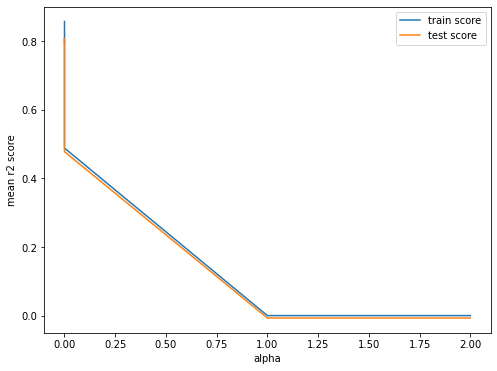

In [132]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

Analysis of the above graph
From the above graph we can see that with very lower value of alpha (almost colse to 0) the accuracy of the train and test set is the highest. Coincidentally they both are alomost same.


Train Score


As the alpha (lambda) increases, the r2 score decreases. That means the error increases. Because the model becomes less overfitting and more generalised. At 0.002 (close to 0) the train set accury is highest(more than 80%).
Test Score

At alpha = 0.002 the test accuracy is highest (more than 80%).
After alpha=0.002, the r2 score started decreasing as the alpha is increasing. Hence, the model accuracy started dipping.
We need to pick the value of aplha for which the test score peaks up. In this case at alpha=0.002, the error is least in the test set and hence the accuracy is more approximately 80%.

So, the optimum alpha will be 0.002, for which we will have a right balance between the error and the generalisation of the model for creating a simpler model.

In [133]:
# Instantiate Lasso regression with alpha=0.002
model_lasso = Lasso(0.002)
# Fitting the model with the train set
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Model evaluation Lasso Regression

In [134]:
#on Training set

y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.7501905443171225


In [135]:
#Model performance on test set

y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.7243790549071165


Conclusion
We have train set accuracy 75% whereas test set accuracy is 72%. From the accuracy gap, 
we can conclude that what the model learnt on the train set, it performed well on the test set.

In [136]:
# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, model_lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

[('constant', 0.162),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.002),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.148),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.015),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('GarageArea', 0.045),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('AgeHouse', -0.0),
 ('MSZoning_RL', 0.007),
 ('LotShape_Reg', -0.007),
 ('LotConfig_Inside', -0.0),
 ('Neighborhood_BrkSide', -0.0),
 ('Neighborhood_CollgCr', -0.0),
 ('Neighborhood_Crawfor', 0.0),
 ('Neighborhood_Edwards', -0.0),
 ('Neighborhood_Gilbert', -0.0),
 ('Neighborhood_NAmes', -0.0),
 ('Neighborhood_NWAmes', 0.0),
 ('Neighborhood_NridgHt', 0.011),
 ('Neighborhood_OldTown', -0.0),
 ('Neighborhood_Sawyer', -0.0),
 ('Neighborh

In [137]:
# Feature selected by Lasso Regression
# Parameters having coefficients greater than 1
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df

Params   Coef
0                   constant  0.162
8                   2ndFlrSF  0.002
10                 GrLivArea  0.148
13                  FullBath  0.015
14                  HalfBath  0.002
17                GarageArea  0.045
26               MSZoning_RL  0.007
27              LotShape_Reg -0.007
36      Neighborhood_NridgHt  0.011
45             OverallQual_6 -0.001
47             OverallQual_8  0.018
52           RoofStyle_Gable -0.009
58           MasVnrType_None -0.004
60              ExterQual_TA -0.030
62          Foundation_PConc  0.006
63               BsmtQual_Ex  0.076
66           BsmtExposure_Gd  0.028
68           BsmtExposure_No -0.003
71          BsmtFinType1_GLQ  0.021
75              HeatingQC_Ex  0.009
78            KitchenQual_TA -0.016
80  FireplaceQu_No Fireplace -0.032
82         GarageType_Attchd  0.009
85          GarageFinish_Fin  0.013
92             MSSubClass_20  0.006
94             MSSubClass_60  0.014

In [138]:
# Minus one as we have constant present in lasso_params_df
len(lasso_params_df)-1

25

In [139]:
# Sorting the parameters with their Coefficient values
lasso_params_df.sort_values('Coef',ascending=False)

Params   Coef
0                   constant  0.162
10                 GrLivArea  0.148
63               BsmtQual_Ex  0.076
17                GarageArea  0.045
66           BsmtExposure_Gd  0.028
71          BsmtFinType1_GLQ  0.021
47             OverallQual_8  0.018
13                  FullBath  0.015
94             MSSubClass_60  0.014
85          GarageFinish_Fin  0.013
36      Neighborhood_NridgHt  0.011
75              HeatingQC_Ex  0.009
82         GarageType_Attchd  0.009
26               MSZoning_RL  0.007
92             MSSubClass_20  0.006
62          Foundation_PConc  0.006
8                   2ndFlrSF  0.002
14                  HalfBath  0.002
45             OverallQual_6 -0.001
68           BsmtExposure_No -0.003
58           MasVnrType_None -0.004
27              LotShape_Reg -0.007
52           RoofStyle_Gable -0.009
78            KitchenQual_TA -0.016
60              ExterQual_TA -0.030
80  FireplaceQu_No Fireplace -0.032

In [ ]:
#Top 5 vars 

In [140]:
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
(lasso_params_df.sort_values('Coef', ascending=False)).head(6)

Params   Coef
0           constant  0.162
10         GrLivArea  0.148
63       BsmtQual_Ex  0.076
17        GarageArea  0.045
66   BsmtExposure_Gd  0.028
71  BsmtFinType1_GLQ  0.021

In [142]:
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
(lasso_params_df.sort_values('Coef', ascending=False)).head(11)

Params   Coef
0               constant  0.162
10             GrLivArea  0.148
63           BsmtQual_Ex  0.076
17            GarageArea  0.045
66       BsmtExposure_Gd  0.028
71      BsmtFinType1_GLQ  0.021
47         OverallQual_8  0.018
13              FullBath  0.015
94         MSSubClass_60  0.014
85      GarageFinish_Fin  0.013
36  Neighborhood_NridgHt  0.011

### Alpha value is double now:

In [143]:
# Instantiate Ridge regression with alpha=4
model_ridge = Ridge(alpha=4)
# Fitting the model with the train set
model_ridge.fit(X_train, y_train)


y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

#Model performance 
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))


0.8450188281617685
0.8330752748498258


There is negligebile changes in train and test score

In [144]:


# Coefficients list
model_ridge_parameters = list(model_ridge.coef_)
# Inserting Y Intercept to model parameters list
model_ridge_parameters.insert(0, model_ridge.intercept_)
# Rounding off the coefficients
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))
ridge_param_list

ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
(ridge_params_df.sort_values('Coef', ascending=False)).head(6)

Params   Coef
10   GrLivArea  0.113
7     1stFlrSF  0.099
8     2ndFlrSF  0.082
0     constant  0.076
3   MasVnrArea  0.060
17  GarageArea  0.058

for Lasso Alpha value is double now 

In [145]:
# Instantiate Lasso regression with alpha=0.002
model_lasso = Lasso(0.004)
# Fitting the model with the train set
model_lasso.fit(X_train, y_train)

#on Training set

y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

#Model performance on test set

y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, model_lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
(lasso_params_df.sort_values('Coef', ascending=False)).head(6)

0.6442526460217411
0.5875134860897018


Params   Coef
0           constant  0.238
63       BsmtQual_Ex  0.076
71  BsmtFinType1_GLQ  0.019
94     MSSubClass_60  0.017
66   BsmtExposure_Gd  0.015
85  GarageFinish_Fin  0.013

## for question 3 drop the top 5 vars and create the model again for lasso

In [147]:
# Instantiate Lasso regression with alpha=0.002
X_train.drop(['GrLivArea', 'BsmtQual_Ex','GarageArea','BsmtExposure_Gd','BsmtFinType1_GLQ'], axis=1, inplace =True)
model_lasso = Lasso(0.002)
# Fitting the model with the train set
model_lasso.fit(X_train, y_train)

#on Training set

y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))


0.6897144738620956


In [148]:
#Model performance on test set

X_test.drop(['GrLivArea', 'BsmtQual_Ex','GarageArea','BsmtExposure_Gd','BsmtFinType1_GLQ'], axis=1, inplace =True)

y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.6576039440688275


In [149]:
# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, model_lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
(lasso_params_df.sort_values('Coef', ascending=False)).head(6)

Params   Coef
0               constant  0.214
7               1stFlrSF  0.087
8               2ndFlrSF  0.067
34  Neighborhood_NridgHt  0.045
80      GarageFinish_Fin  0.023
12              FullBath  0.023